> by Cengizhan Aydin (cay7466) and Viktoriia Simakova (vsi3776)

# Generative Models

### Exercise 1 - Transposed Convolution

**Summary:**

In this exercise you will learn how to use the Conv2DTranspose layer to "scale-up" a feature map from a lower dimension to a higher dimension inside a CNN.
I have provided you (cell below) with a stub of an autoencoder (the down-path).

**Your Tasks in this exercise:**
* Add Conv2DTranspose layers to the autoencoder to match the input shape with the network's output shape. Use the ```model.summary()``` method to track and understand your progress.

**Find out and Answer:**
* What is the impact of using different strides and padding settings?
* What is the impact of using different kernel sizes ?
* How many filters should we use in each layer of the up-sampling path, what makes sense?




In [5]:
import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Conv2D, Conv2DTranspose


model = tf.keras.Sequential()
model.add(InputLayer(input_shape=(128,128,3)))
model.add(Conv2D(filters=8, kernel_size=(4,4), strides=(2,2), padding='same'))
model.add(Conv2D(filters=16, kernel_size=(4,4), strides=(2,2), padding='same'))
model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(2,2), padding='same'))
model.add(Conv2DTranspose(filters=3, kernel_size=4, strides=8, padding='same'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 64, 64, 8)      │           392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 16)     │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 128, 128, 3)    │         1,539 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,219 (47.73 KB)

 Trainable params: 12,219 (47.73 KB)

 Non-trainable params: 0 (0.00 B)

#### Answers Excercise 1

* _What is the impact of using different strides and padding settings?_
  * The Input gets multipled by the amount the filter takes strides _(16x16 * 4 = 64x64)_
* _What is the impact of using different kernel sizes?_
  * it increases the number of parameters that get taken into account
* _How many filters should we use in each layer of the up-sampling path, what makes sense?_
  * the further you come to the output layer the more you should try to reduce the amount of filters to reduce the computation required, while still capturing important features

<img src="https://i.redd.it/wbjwxvte4gt41.jpg" />

### Exercise 2 - Autoencoder

**Summary:**

In this exercise you will create a *convolutional* autoencoder that can be used for the mnist data.

**Data**:

In this exercise we will use the mnist dataset. The mnist dataset is a small and simple dataset containing images of numbers between 0-9.
I have provided you with a cell to load and preprocess the dataset below. Have a look at the data to get a solid understanding on what you
are working with.

**Your Tasks in this exercise:**

* Build a *convolutional* (using Conv2D and Conv2DTranspose layers) autoencoder for the mnist data.
* Think about what *activation* functions make sense
* Make sure you build the autoencoder using the **U** architecture (see slides)
* 1x1 Conv2D layers can be used to "reshape" the final output
* Train the autoencoder using the training portion of the mnist data
* Visualize your results


**Find out and Answer:**
* Explain which activation functions you chose and why you chose them.
* What happens if we use different kernel sizes in the Conv2D and the associated Conv2DTranspose layer.








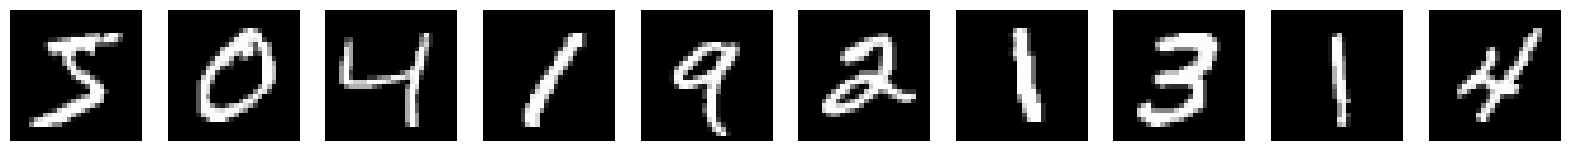

In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# print first 10 images from x_train in one subplot in a line
fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    ax[i].imshow(x_train[i,:], cmap='gray')
    ax[i].axis('off')

x_train = x_train / 255
x_test = x_test / 255

In [6]:
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, UpSampling2D

model = tf.keras.Sequential()

# input Layer
model.add(InputLayer(input_shape=(28,28,1)))

# Encoder
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Decoder
model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
model.add(UpSampling2D(size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
model.add(UpSampling2D(size=(2,2)))
model.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'))

model.summary()

C:\Users\cengi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,217 (12.57 KB)

 Trainable params: 3,217 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Compile and train the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_model = model.fit(x_train, x_train, epochs=100, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8069 - loss: 0.1525 - val_accuracy: 0.8138 - val_loss: 0.0785
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8149 - loss: 0.0780 - val_accuracy: 0.8141 - val_loss: 0.0747
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8152 - loss: 0.0748 - val_accuracy: 0.8142 - val_loss: 0.0729
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8148 - loss: 0.0734 - val_accuracy: 0.8142 - val_loss: 0.0718
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8153 - loss: 0.0723 - val_accuracy: 0.8143 - val_loss: 0.0713
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8152 - loss: 0.0716 - val_accuracy: 0.8143 - val_loss: 0.0706
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8152 - loss: 0.0711 - val_accuracy: 0.8143 - val_loss: 0.0703
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8151 - loss: 0

In [8]:
_, accuracy = model.evaluate(x_test, x_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8217 - loss: 0.0668
Accuracy: 81.44


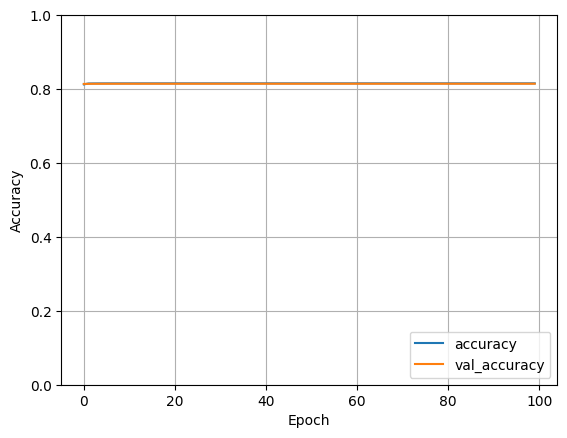

In [9]:
plt.plot(history_model.history['accuracy'], label='accuracy')
plt.plot(history_model.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.grid()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


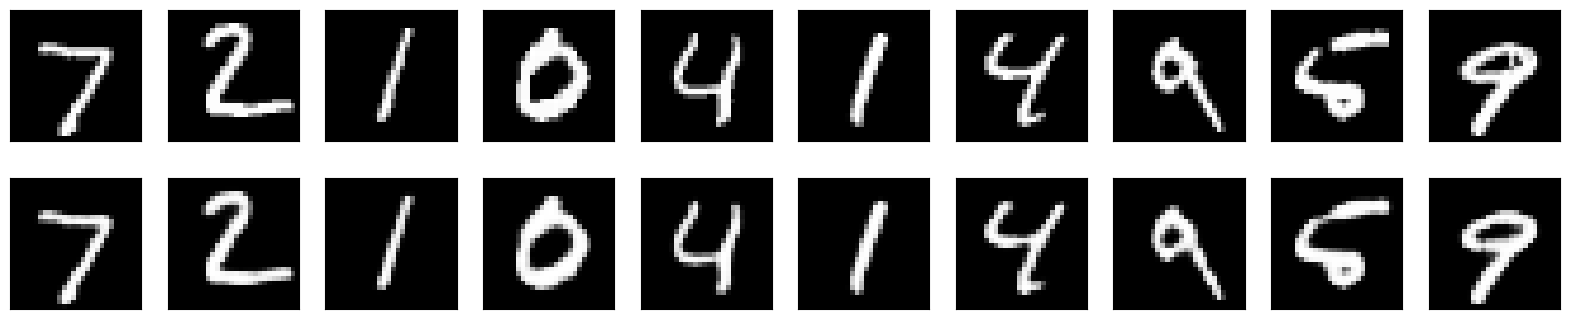

In [10]:
decoded_imgs = model.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + n+1)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

#### Answers 2

* _Explain which activation functions you chose and why you chose them._
  * **ReLU**
    * ReLU introduces non-linearity to the network and therefore allows the NN to learn complex patterns in the data
    * for the bigger layers computational efficient
    * avoids vanishing gradient problem
  * **Sigmoid**
    * used in the final layer
    * sqaush is suitable for binary classification task
    * useful for reconstructing pixel intensities
* _What happens if we use different kernel sizes in the Conv2D and the associated Conv2DTranspose layer._
  * Information Loss
    * Smaller kernel sizes capture finer details while larger kernel sizes capture broader features. This discrepancy could result in loss of information during the encoding and decoding process, as the decoder may not be able to accurately reconstruct the original input
  * Distorted Reconstruction
    * The decoder's ability to reconstruct the original input would be compromised. If the kernel size in the Conv2DTranspose layers is smaller than that in the corresponding Conv2D layers, the decoder may struggle to capture the necessary level of detail for reconstruction. This could lead to blurry or distorted output images

<img src="https://i.imgur.com/YrKMIE2.jpeg" height=400 />

### Exercise 3 - Autoencoders for Denoising

**Summary:**
In this exercise you will build and train an autoencoder to remove noise from images. We can do this by starting with "clean" image-data and adding artifical noise to it. The training subjective for the autoencoder is to reconstruct the "clean" image from the noisy input.

**Data**:
In this exercise we will use the mnist dataset. The mnist dataset is a small and simple dataset containing images of numbers between 0-9.
I have provided you with a cell to load and preprocess the dataset below. Have a look at the data to get a solid understanding on what you
are working with.

**Your Tasks in this exercise:**

* Build a *convolutional* (using Conv2D and Conv2DTranspose layers) autoencoder for the mnist data.
* Create a noisy input dataset by adding artificial noise to the mnist data. We can put noise into an image by simply adding a random vector (you can use ```np.random.randn()``` to create random noise-tensors).
* Train your autoencoder model using a suitable loss function.
* Evaluate your results on the (noisy and clean) test portion of the mnist dataset, visualize your results.


**Find out and Answer:**
* What loss function did you choose and why?
* How many layers do you need and how many filters for each layer do you need to get satisfying results?
* What is the highest amount of noise (standard deviation of the gaussian distribution used to generate the noise) the autoencoder can still handle?

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

In [16]:
factor = 0.99

noisy_x_train = x_train + np.random.randn(x_train.shape[0], 28, 28) * factor
noisy_x_test = x_test + np.random.randn(x_test.shape[0], 28, 28) * factor

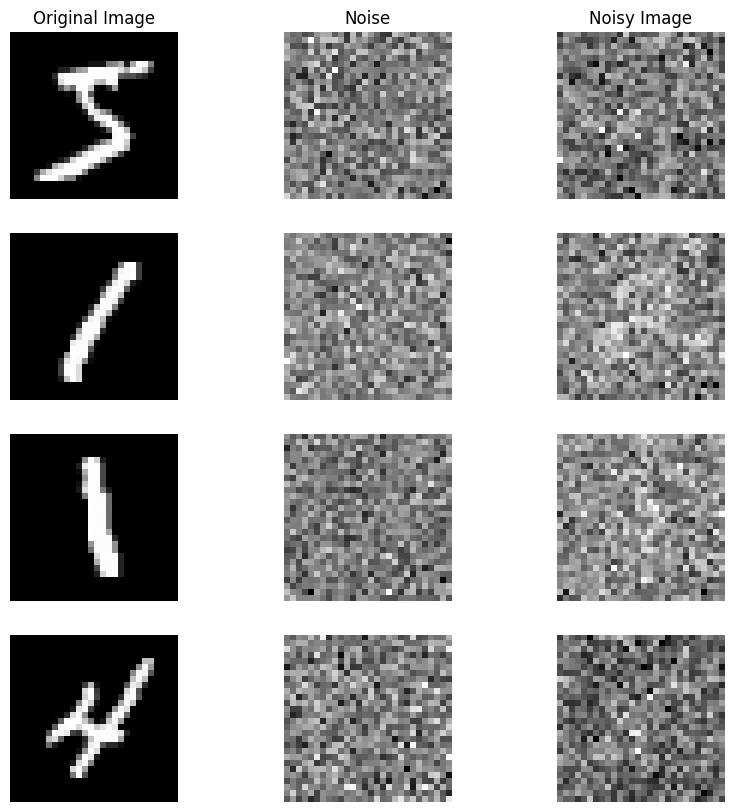

In [45]:
fig, axs = plt.subplots(4, 3, figsize = (10, 10))

axs[0, 0].set_title('Original Image')
axs[0, 1].set_title('Noise')
axs[0, 2].set_title('Noisy Image')  


for i in range(4*3):

  original = x_train[i]
  noise = np.random.randn(28, 28) * factor
  noisy_image = original + noise

  ax = axs[i//3, i%3]

  ax.axis("off")

  if i%3 == 0:
    ax.imshow(original, cmap='gray')
  elif i%3 == 1:
    ax.imshow(noise, cmap='gray')
  else:
    ax.imshow(noisy_image, cmap='gray')


In [35]:
# build model to denoise black and white mnsit data images

model = Sequential()

# input Layer
model.add(InputLayer(input_shape=(28,28,1)))

# Encoder
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=8, kernel_size=(5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Decoder
model.add(Conv2D(filters=8, kernel_size=(5,5), activation='relu', padding='same'))
model.add(UpSampling2D(size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(5,6), activation='relu', padding='same'))
model.add(UpSampling2D(size=(2,2)))
model.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'))

model.summary()

C:\Users\cengi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 8)      │         3,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 8)        │         1,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 16)     │         3,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,233 (36.07 KB)

 Trainable params: 9,233 (36.07 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_model = model.fit(noisy_x_train, x_train, epochs=50, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8013 - loss: 0.2236 - val_accuracy: 0.8092 - val_loss: 0.1355
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8032 - loss: 0.1633 - val_accuracy: 0.8126 - val_loss: 0.1234
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8040 - loss: 0.1582 - val_accuracy: 0.8125 - val_loss: 0.1205
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8041 - loss: 0.1562 - val_accuracy: 0.8127 - val_loss: 0.1180
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8047 - loss: 0.1543 - val_accuracy: 0.8129 - val_loss: 0.1177
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8053 - loss: 0.1531 - val_accuracy: 0.8129 - val_loss: 0.1183
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8053 - loss: 0.1520 - val_accuracy: 0.8128 - val_loss: 0.1211
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8052 - loss: 0.1515 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8202 - loss: 0.1097
Accuracy: 81.29


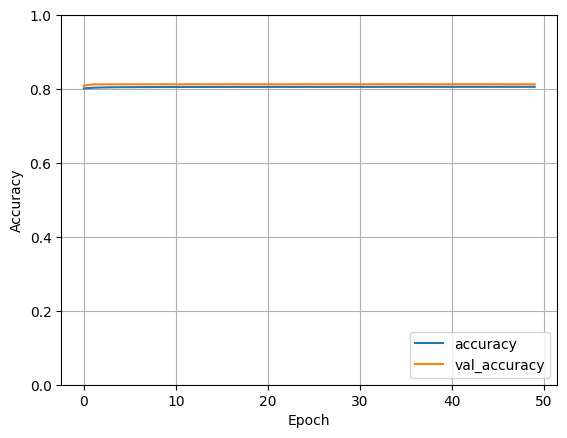

In [38]:
_, accuracy = model.evaluate(x_test, x_test)
print('Accuracy: %.2f' % (accuracy*100))

plt.plot(history_model.history['accuracy'], label='accuracy')
plt.plot(history_model.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.grid()
plt.show()

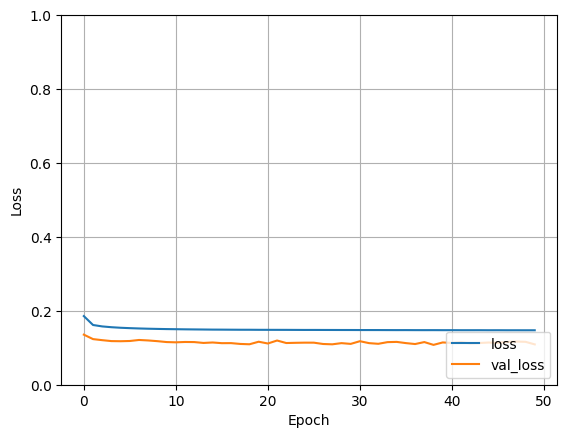

In [39]:
plt.plot(history_model.history['loss'], label='loss')
plt.plot(history_model.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.grid()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


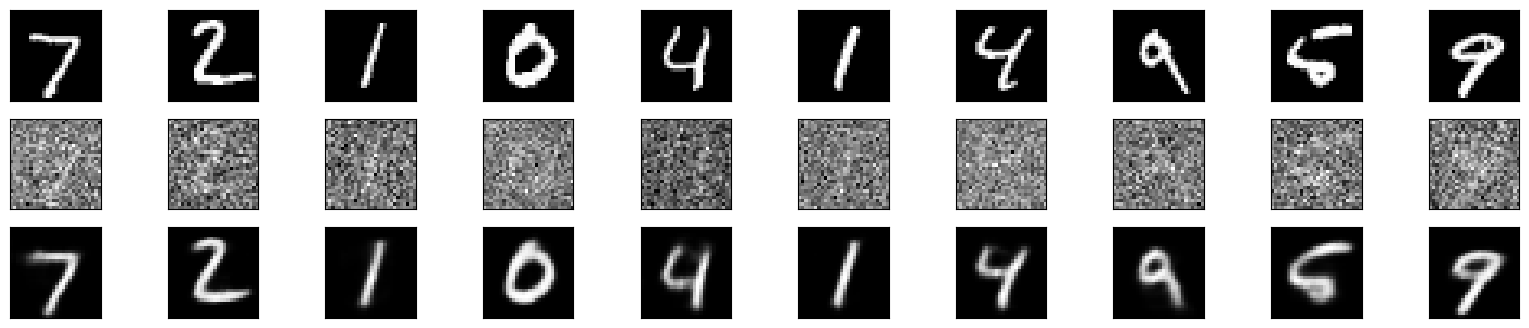

In [47]:
decoded_imgs = model.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))

for i in range(n):
  # display original
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display noisy image
  ax = plt.subplot(3, n, i + n + 1)
  plt.imshow(noisy_x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(3, n, i + 2 * n + 1)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
plt.show()


<img src="https://i.redd.it/orch6qna8eb51.jpg" />

### Exercise 4 - Latent Space of an Autoencoder


**Summary:**


**Data**:
In this exercise we will use the mnist dataset. The mnist dataset is a small and simple dataset containing images of numbers between 0-9.
I have provided you with a cell to load and preprocess the dataset below. Have a look at the data to get a solid understanding on what you
are working with.

**Your Tasks in this exercise:**

* Build an train an autoencoder for the mnist data.
* Split the autoencoder model into an encoder and decoder part (use the functional API via ```tf.keras.Model(inputs=, outputs=)```).
* Compute the latent vector for an image.
* Modify the latent vector and reconstruct it, compare it to the original.
* Create a random latent vector and reconstruct it, compare it to the original.

**Find out and Answer:**
* How does modifying the latent vector influence the reconstruction result ?





In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Reshape, UpSampling2D
from tensorflow.keras.models import Model

input = Input(shape=(28, 28, 1))
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(input)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
encoded = MaxPooling2D((2, 2), padding='same')(encoded)
encoded = Conv2D(8, (3, 3), strides=(2,2), activation='relu', padding='same')(encoded)
encoded = Flatten()(encoded)

decoded=Reshape((4, 4, 8))(encoded)
decoded=Conv2D(8, (3, 3), activation='relu', padding='same')(decoded)
decoded=UpSampling2D((2, 2))(decoded)
decoded=Conv2D(8, (3, 3), activation='relu', padding='same')(decoded)
decoded=UpSampling2D((2, 2))(decoded)
decoded=Conv2D(16, (3, 3), activation='relu')(decoded)
decoded=UpSampling2D((2, 2))(decoded)
decoded=Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

autoencoder = Model(input, decoded)

In [10]:
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[7].output)

encoder.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 4, 4, 8)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,904 (7.44 KB)

 Trainable params: 1,904 (7.44 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
encoded_input = Input(shape=(128,))

deco = autoencoder.layers[-8](encoded_input)
deco = autoencoder.layers[-7](deco)
deco = autoencoder.layers[-6](deco)
deco = autoencoder.layers[-5](deco)
deco = autoencoder.layers[-4](deco)
deco = autoencoder.layers[-3](deco)
deco = autoencoder.layers[-2](deco)
deco = autoencoder.layers[-1](deco)
# create the decoder model
decoder = Model(encoded_input, deco)
decoder.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,481 (9.69 KB)

 Trainable params: 2,481 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history = autoencoder.fit(x_train, x_train, epochs=25, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8148 - loss: 0.0778 - val_accuracy: 0.8139 - val_loss: 0.0768
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8153 - loss: 0.0777 - val_accuracy: 0.8138 - val_loss: 0.0768
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8150 - loss: 0.0778 - val_accuracy: 0.8139 - val_loss: 0.0768
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8146 - loss: 0.0777 - val_accuracy: 0.8138 - val_loss: 0.0769
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8149 - loss: 0.0777 - val_accuracy: 0.8140 - val_loss: 0.0768
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8148 - loss: 0.0777 - val_accuracy: 0.8139 - val_loss: 0.0767
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8144 - loss: 0.0776 - val_accuracy: 0.8139 - val_loss: 0.0766
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8149 - loss: 0.0775 -

In [18]:
_, accuracy = autoencoder.evaluate(x_test, x_test)
print('Accuracy: %.2f' % (accuracy * 100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8212 - loss: 0.0751
Accuracy: 81.39


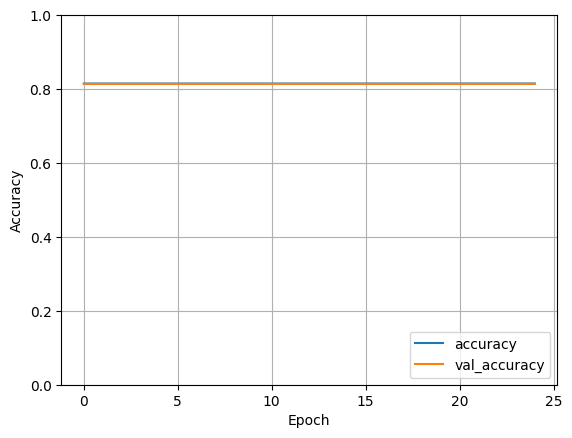

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.grid()
plt.show()

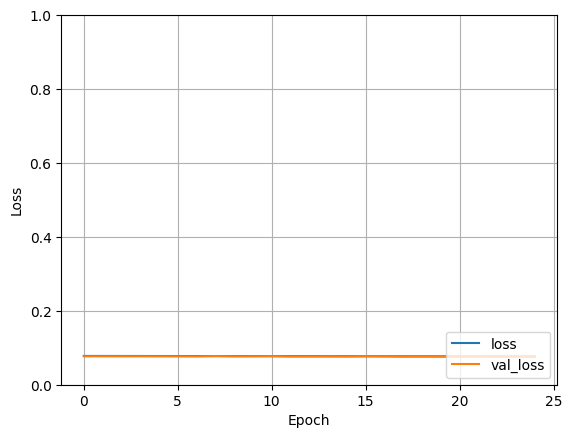

In [22]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [23]:
# Random image 1
test_image_1 = x_test[0].reshape(1,28,28,1)

# Random image 2
test_image_2 = x_test[6].reshape(1,28,28,1)

encoded_img_1 = encoder.predict(test_image_1)
encoded_img_2 = encoder.predict(test_image_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [26]:
import numpy as np

def interpolate_points(p1, p2, n_steps=10):
	# interpolate ratios between the points
	ratios = np.linspace(0, 1, num=n_steps)
	# linear interpolate vectors
	vectors = list()
	for ratio in ratios:
		v = (1.0 - ratio) * p1 + ratio * p2
		vectors.append(v)
	return np.asarray(vectors)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


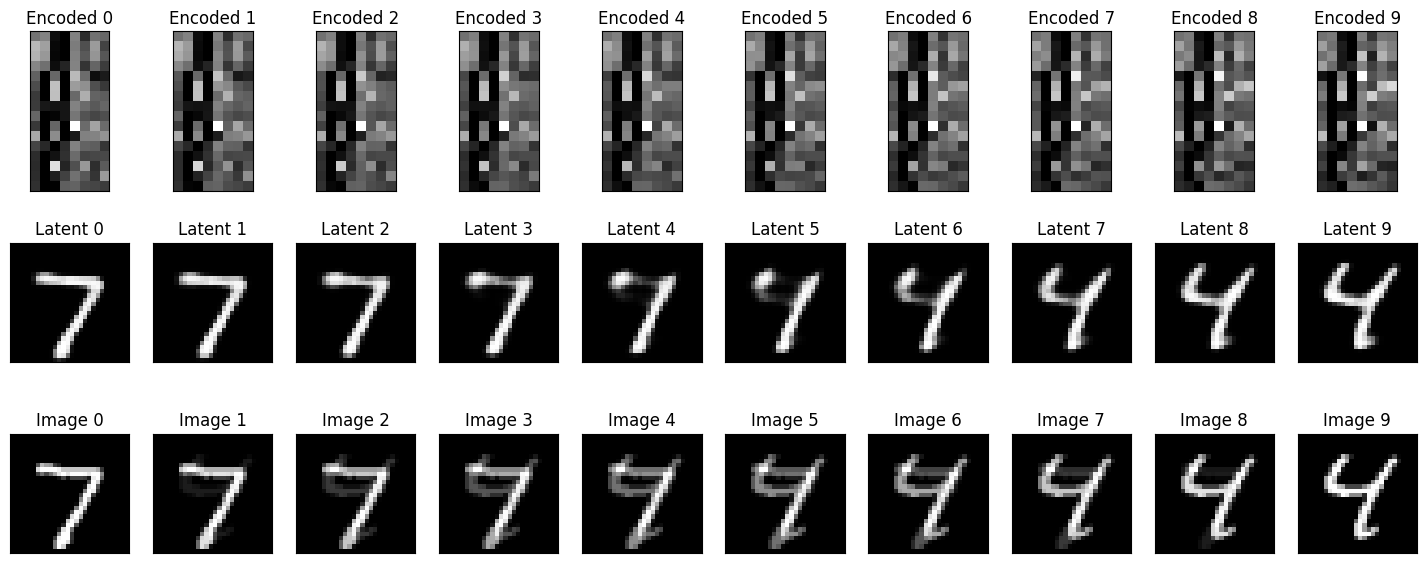

In [29]:
interpolated_images = interpolate_points(
    encoded_img_1.flatten(), encoded_img_2.flatten())
interpolated_orig_images = interpolate_points(
    test_image_1.flatten(), test_image_2.flatten())

plt.figure(figsize=(20,12))

n = 11

for i, image_idx in enumerate(interpolated_images):

    ax = plt.subplot(5, n, i + 1)
    plt.imshow(interpolated_images[i].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Encoded {}".format(i))

    ax = plt.subplot(5, n, n + i + 1)
    plt.imshow(decoder.predict(
        interpolated_images[i].reshape(1, 128)).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Latent {}".format(i))

    ax = plt.subplot(5, n, 2 * n + i + 1)
    plt.imshow(interpolated_orig_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Image {}".format(i))

plt.show()

<img src="https://matthewmcateer.me/media/ml_memes/gan_training.png" height=500 />

### Exercise 5 - Variational Autoencoder


**Summary:**

In this exercise we will study the implementation and behavior of *Variational Autoencoders*. I have provided you with an implementation of a simple Variational Autoencoder in the cells below. We will use the code to learn how the theory connects to the real world.

**Data**:

In this exercise we will use the mnist dataset. The mnist dataset is a small and simple dataset containing images of numbers between 0-9.
I have provided you with a cell to load and preprocess the dataset below. Have a look at the data to get a solid understanding on what you
are working with.

**Your Tasks in this exercise:**

* Read through and understand the source code and answer the questions below.
* Write comments for the source code in a meaningful way.
* Train the Variational Autoencoder for 1,5,15 and 30 epochs, plot the label-clusters and latent-space for each.
* Interpret the label-clusters and latent-space for each trained epoch.
* Create an image using the trained decoder of the number 4, 3 and 7 by manually creating the corresponding latent-space representation.


**Find out and Answer:**
* Explain why we use the sampling layers, what does it do?
* Explain the architectural difference of the neural nets compared to the autoencoders you created before.
* Explain the loss function.
* What is the input to decoder?



This cell loads a file with some helper functions for plotting and prepares the data for the VAE.

In [138]:
!python -m wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/Computer-Vision-Generative-Models/vae_helpers.py


Saved under vae_helpers.py


In [45]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from vae_helpers import plot_latent_space

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
# Concatenate the training and test sets
mnist_digits = np.concatenate([x_train, x_test], axis=0)  
# Expand dimensions and normalize pixel values
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

This cells implements a custom layer, the sampling layer.


In [31]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(_, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [32]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
# Compute the mean of the latent space
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
# Compute the log variance of the latent space
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
# Sample from the latent space using the reparameterization trick
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

# Print the summary of the encoder model
encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 14, 14,    │        320 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 7, 7, 64)  │     18,496 │ conv2d_14[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 3136)      │          0 │ conv2d_15[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 16)        │     50,192 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 2)         │         34 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 2)         │         34 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 2)         │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 69,076 (269.83 KB)

 Trainable params: 69,076 (269.83 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# this code defines a decoder model that takes latent inputs,
# transforms them through dense and convolutional transpose layers,
# and generates output images.

latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3136)           │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,089 (254.25 KB)

 Trainable params: 65,089 (254.25 KB)

 Non-trainable params: 0 (0.00 B)

This cell implements a custom Model. Custom models can be very useful if we wish to have more flexibility in how we train and what loss we use. For more sophisticated applications the keras out-of-the-box functionality is often not enough and we use custom Model implementations.

* The ```metrics()``` function tells keras which metric-trackers should be reset upon the start of each epoch.
* The ```train_step()``` function is called by keras for each batch. It is up to use to implement the training. The computation of gradients is done here using GradientTapes.

In [34]:
class VAE(keras.Model):
    """
    Variational Autoencoder (VAE) class.

    This class represents a Variational Autoencoder model, which consists of an encoder and a decoder.
    It is used for unsupervised learning of latent representations and generative modeling.

    Args:
        encoder: The encoder model.
        decoder: The decoder model.
    """

    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        """
        Returns a list of the metrics to be tracked during training.
        """
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        """
        Performs a single training step.

        Args:
            data: The input data.

        Returns:
            A dictionary containing the loss and metrics values.
        """
        with tf.GradientTape() as tape:
            # Forward pass through the encoder
            z_mean, z_log_var, z = self.encoder(data)

            # Forward pass through the decoder
            reconstruction = self.decoder(z)

            # Compute the reconstruction loss
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )

            # Compute the KL divergence loss
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))

            # Compute the total loss
            total_loss = reconstruction_loss + kl_loss

        # Compute the gradients and update the trainable weights
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        # Update the metrics
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        # Return the loss and metrics values
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

This cell performs the training of the model.

In [59]:
vae_1 = VAE(encoder, decoder)
vae_1.compile(optimizer=keras.optimizers.Adam())

vae_1.fit(mnist_digits, epochs=1, batch_size=128)

547/547 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - kl_loss: 6.3763 - loss: 152.3614 - reconstruction_loss: 145.9851


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

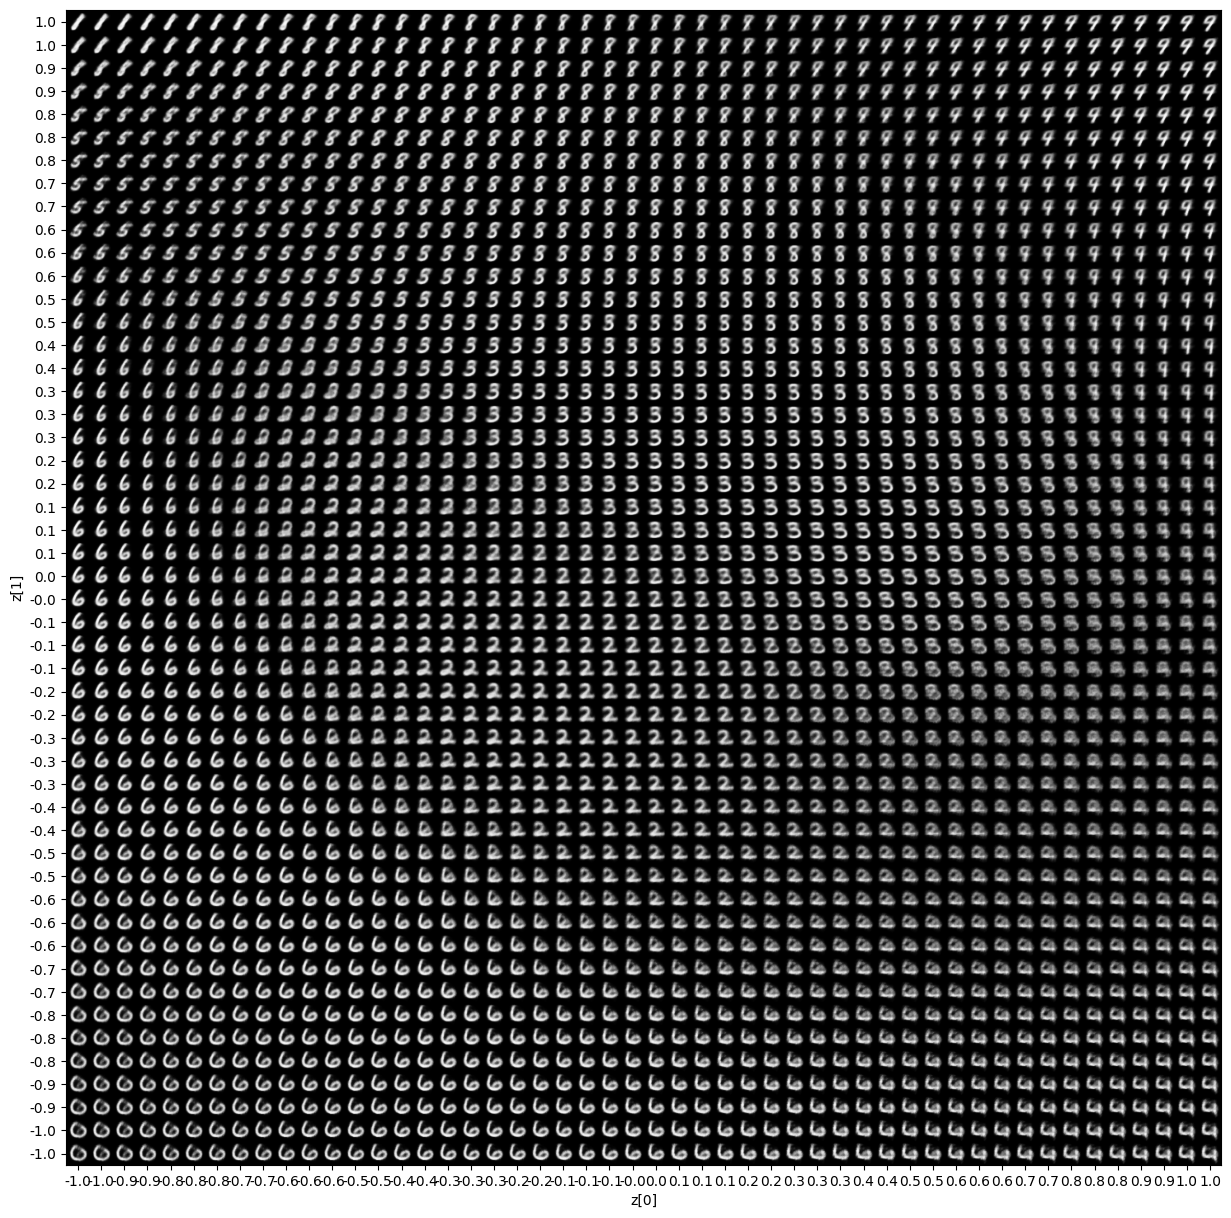

In [58]:
plot_latent_space(vae_1, 50)

----

In [60]:
vae_5 = VAE(encoder, decoder)
vae_5.compile(optimizer=keras.optimizers.Adam())
vae_5.fit(mnist_digits, epochs=5, batch_size=128)

Epoch 1/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - kl_loss: 6.3731 - loss: 151.5819 - reconstruction_loss: 145.2088
Epoch 2/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - kl_loss: 6.3840 - loss: 151.2264 - reconstruction_loss: 144.8423
Epoch 3/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - kl_loss: 6.3762 - loss: 151.9702 - reconstruction_loss: 145.5941
Epoch 4/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - kl_loss: 6.3867 - loss: 151.1572 - reconstruction_loss: 144.7705
Epoch 5/5
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - kl_loss: 6.4038 - loss: 151.0113 - reconstruction_loss: 144.6075


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

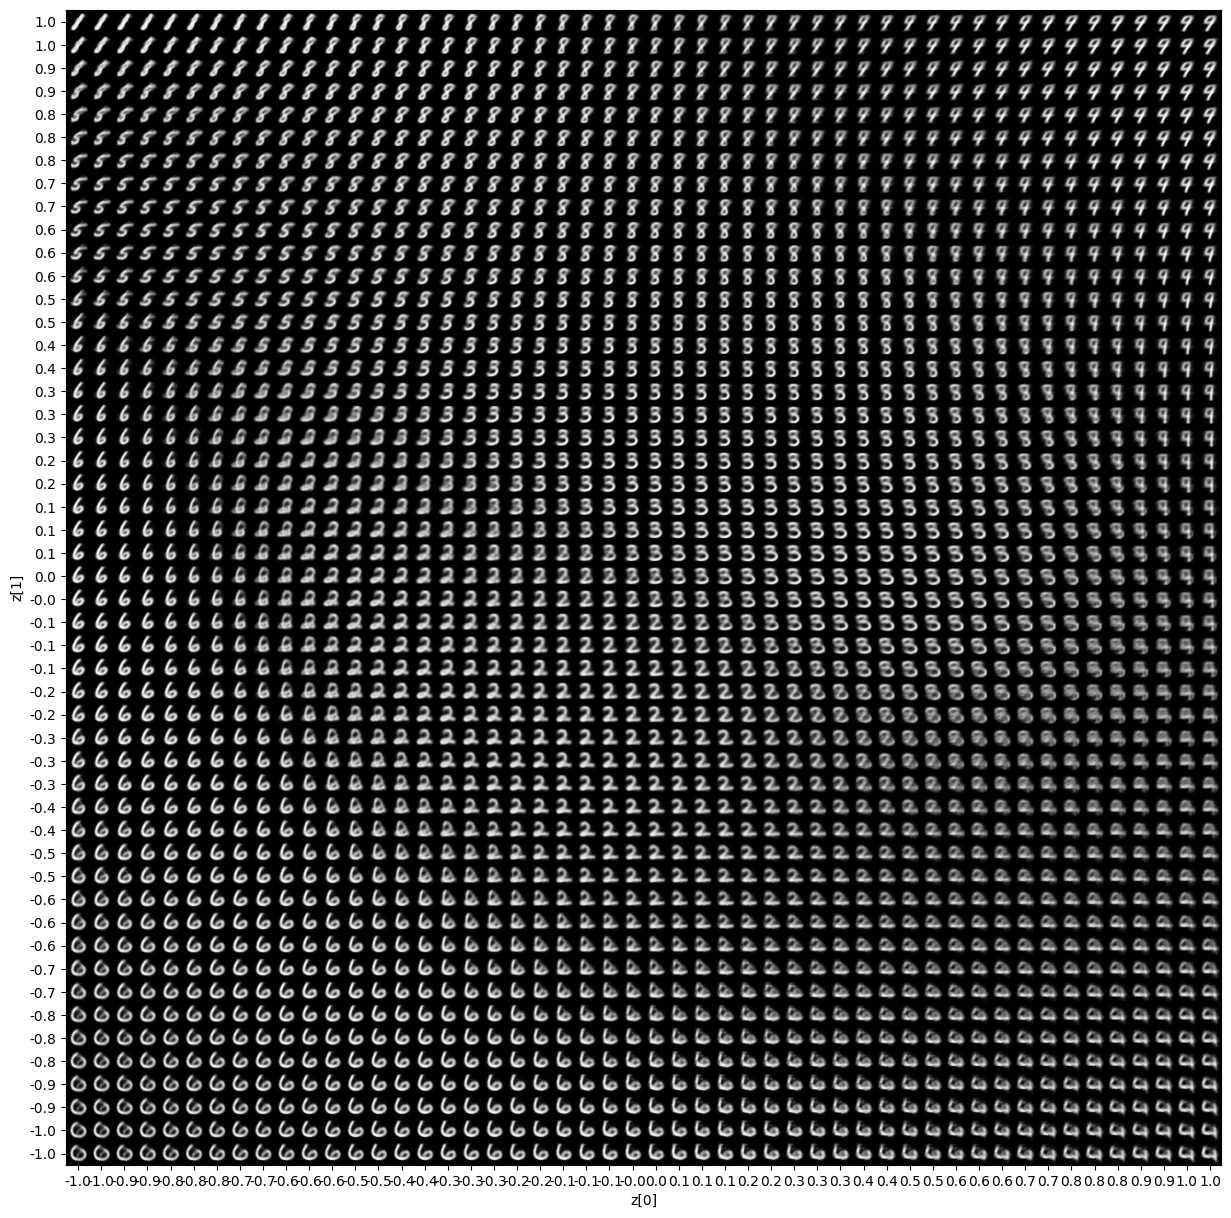

In [61]:
plot_latent_space(vae_5, 50)

----

In [63]:
vae_15 = VAE(encoder, decoder)
vae_15.compile(optimizer=keras.optimizers.Adam())
vae_15.fit(mnist_digits, epochs=15, batch_size=128)

Epoch 1/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - kl_loss: 6.3601 - loss: 151.4685 - reconstruction_loss: 145.1083
Epoch 2/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - kl_loss: 6.4020 - loss: 151.0634 - reconstruction_loss: 144.6615
Epoch 3/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - kl_loss: 6.4102 - loss: 150.6508 - reconstruction_loss: 144.2405
Epoch 4/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - kl_loss: 6.3921 - loss: 150.9350 - reconstruction_loss: 144.5429
Epoch 5/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - kl_loss: 6.4114 - loss: 150.6260 - reconstruction_loss: 144.2145
Epoch 6/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - kl_loss: 6.3965 - loss: 150.6075 - reconstruction_loss: 144.2111
Epoch 7/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - kl_loss: 6.4211 - loss: 150.2289 - reconstruction_loss: 143.8078
Epoch 8/15
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - kl_loss: 6.4065 - loss: 150.5575 - reconstruction_loss: 144.1510
Epoch 9/15
547/547 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

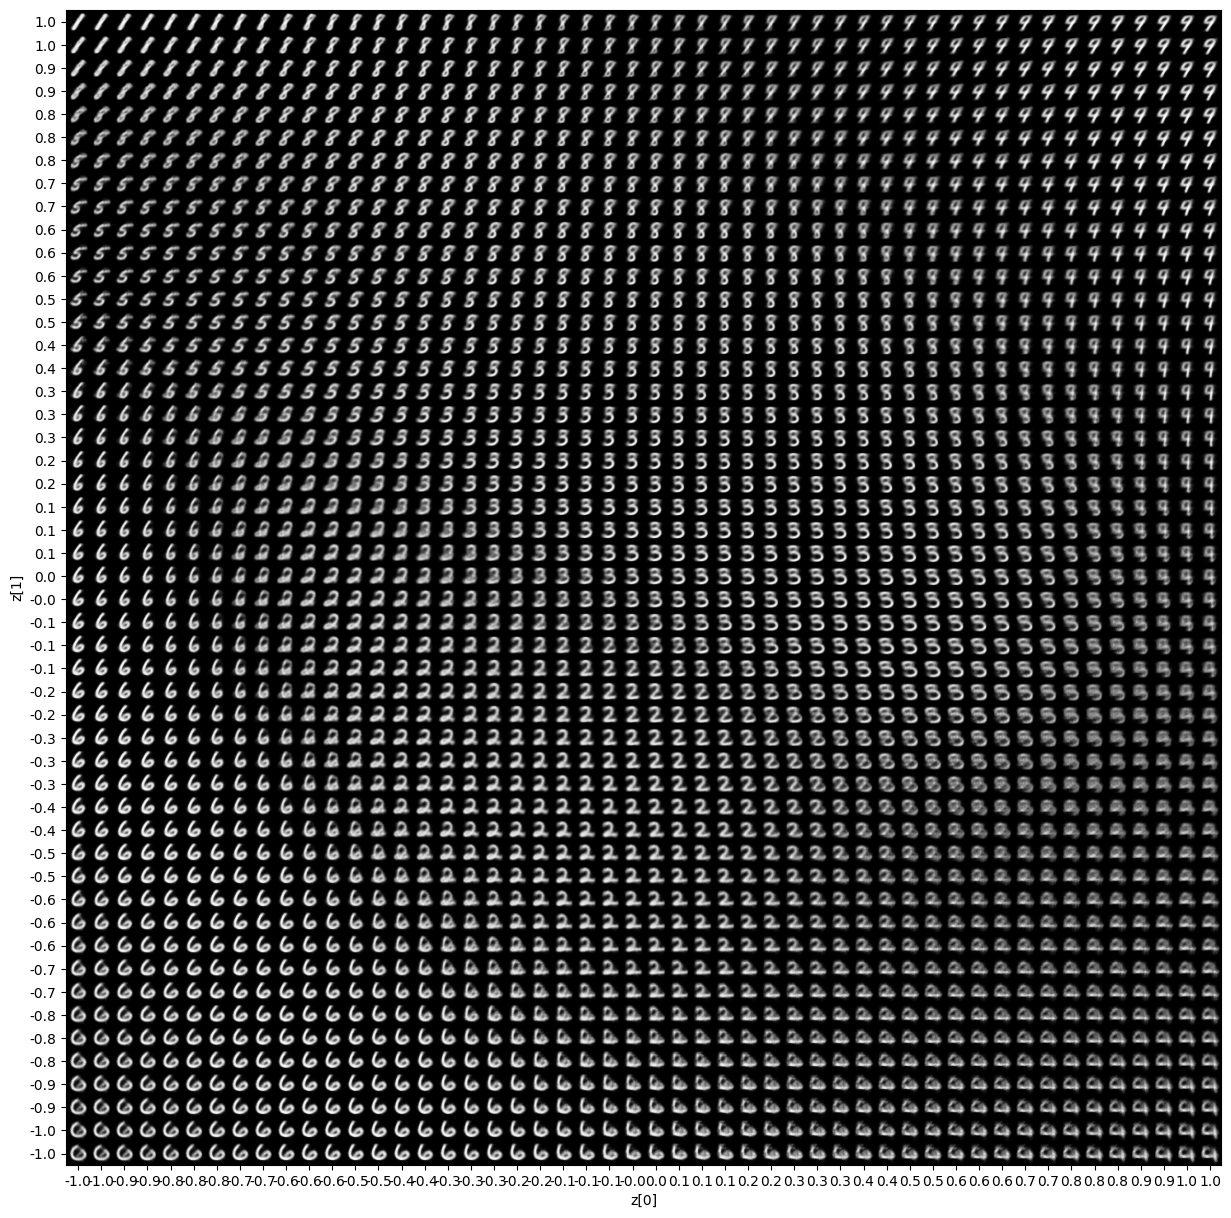

In [64]:
plot_latent_space(vae_15, 50)

----

In [65]:
vae_30 = VAE(encoder, decoder)
vae_30.compile(optimizer=keras.optimizers.Adam())

vae_30.fit(mnist_digits, epochs=30, batch_size=128)

Epoch 1/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - kl_loss: 6.4219 - loss: 150.2389 - reconstruction_loss: 143.8169
Epoch 2/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - kl_loss: 6.4211 - loss: 150.3359 - reconstruction_loss: 143.9148
Epoch 3/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - kl_loss: 6.4459 - loss: 150.0804 - reconstruction_loss: 143.6346
Epoch 4/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - kl_loss: 6.4395 - loss: 149.8552 - reconstruction_loss: 143.4157
Epoch 5/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - kl_loss: 6.4355 - loss: 150.0160 - reconstruction_loss: 143.5805
Epoch 6/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - kl_loss: 6.4424 - loss: 149.8741 - reconstruction_loss: 143.4317
Epoch 7/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - kl_loss: 6.4385 - loss: 150.1586 - reconstruction_loss: 143.7201
Epoch 8/30
547/547 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - kl_loss: 6.4429 - loss: 149.9223 - reconstruction_loss: 143.4794
Epoch 9/30
547/547 ━━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

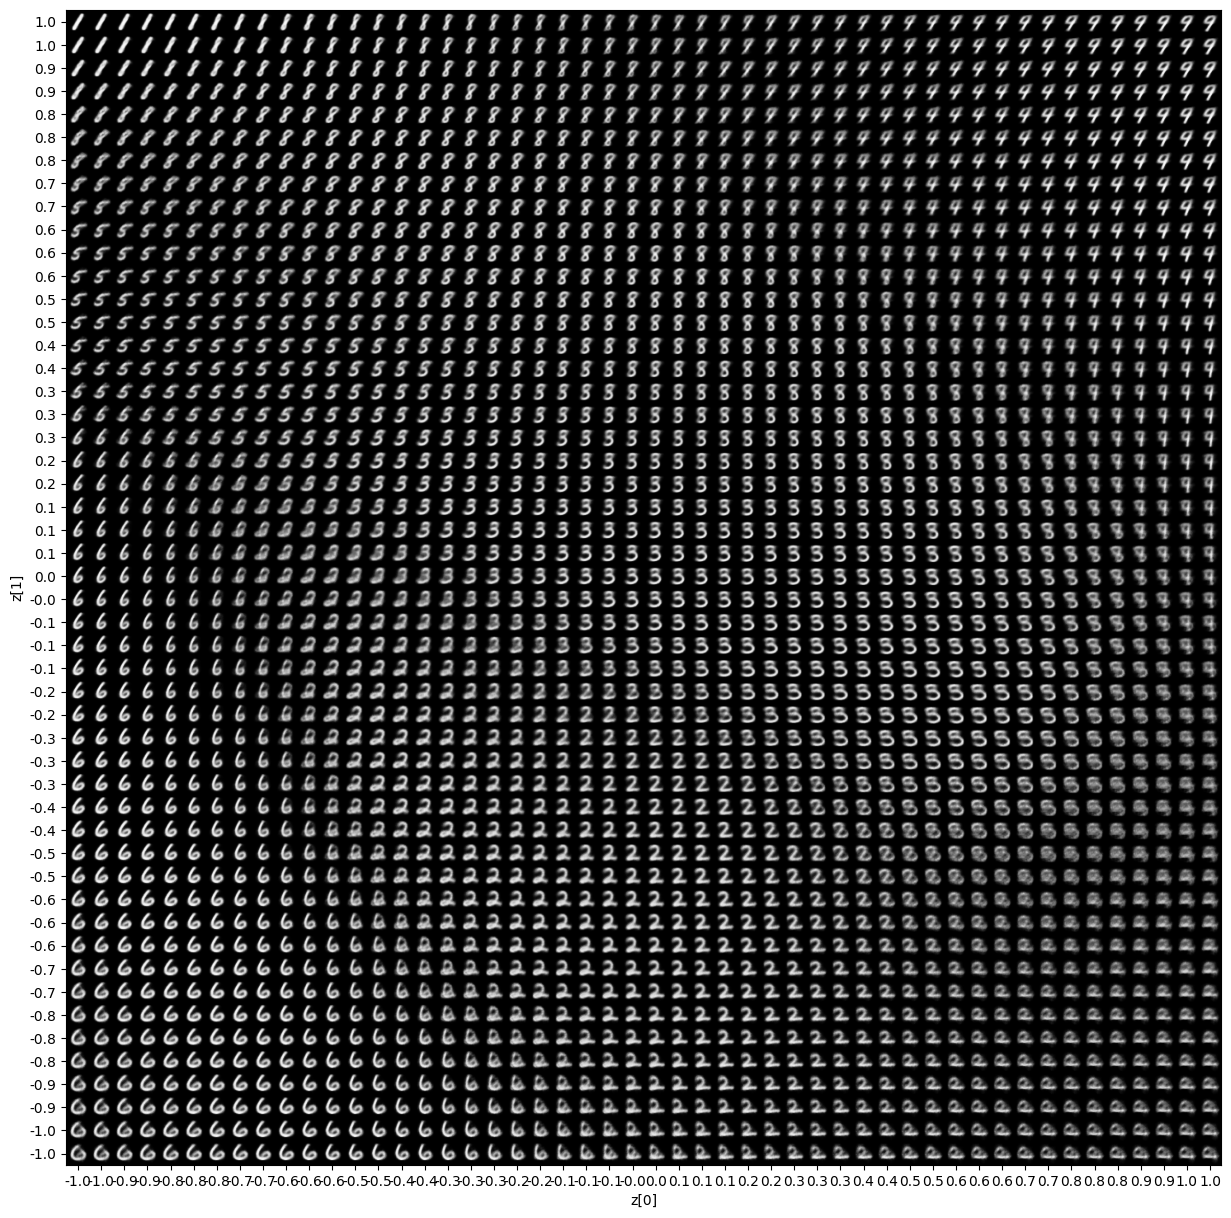

In [66]:
plot_latent_space(vae_30, 50)

This cell plots the label clusters.

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step


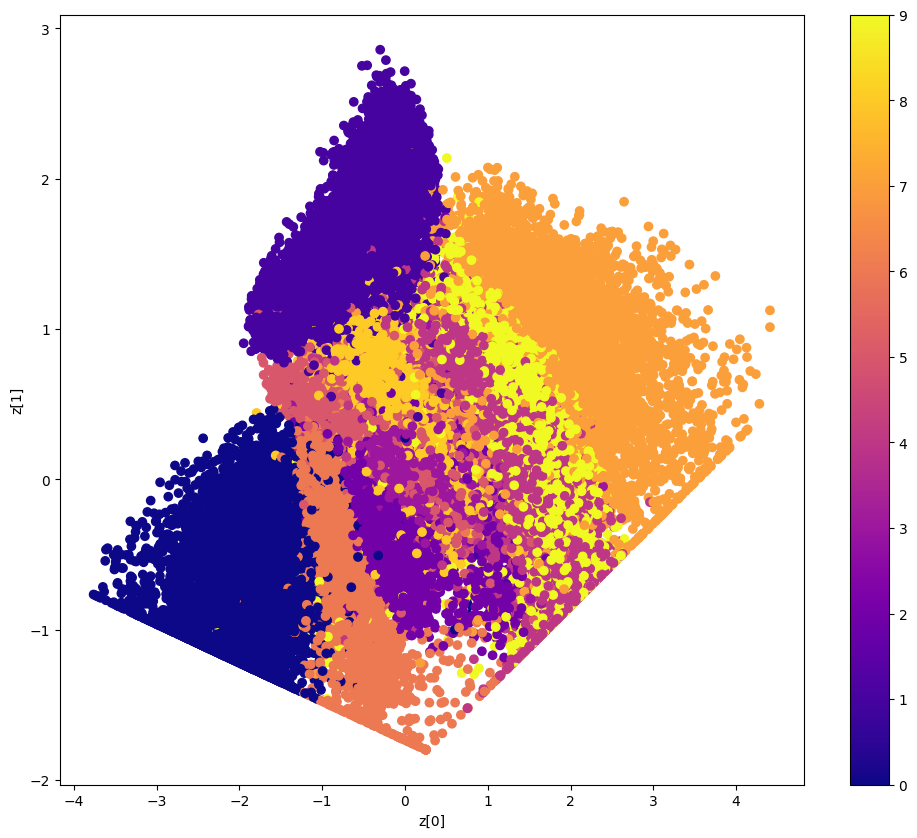

In [67]:
# had to import the function from the vae_helpers.py file because the coloring of the points was not working properly and only were displayed in grayscale

def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels, cmap="plasma")
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae_30, x_train, y_train)

#### Answers 5

* *Explain why we use the sampling layers, what does it do?*
  * The Sampling layer helps Variational Autoencoders sample latent vectors in a way that makes training smoother and more effective.
  * It's crucial for generating realistic data from the model.
* *Explain the architectural difference of the neural nets compared to the autoencoders you created before.*
  * Neural networks map inputs to outputs directly, while autoencoders compress data into a lower-dimensional space and then reconstruct it. So, autoencoders focus on learning efficient representations of data.
* *Explain the loss function.*
  * the loss function contains of two parts
    1. Reconstruction Loss
       * Measures how well the model reconstructs input data compared to the original
    2. KL Divergence Loss
       * Encourages the latent space to resemble a standard normal distribution
  * The total loss is the sum of these two losses 
* *What is the input to decoder?*
  * The input to the decoder is a latent vector, which is a compressed representation of the input data produced by the encoder
  * `latent_inputs = keras.Input(shape=(latent_dim,))`
    * Here, latent_dim specifies the dimensionality of the latent space, which in this case is 2
    * So, the input to the decoder is a vector of size 2, representing a point in the latent space

<img src="https://i.redd.it/h7kryk30kp071.jpg" width=600 />